In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from bs4 import BeautifulSoup
import requests
import sys
import pickle
from sklearn.neighbors import KNeighborsClassifier
import re
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from bs4 import BeautifulSoup, Comment


import pprint
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import seaborn as sns
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

style.use('seaborn-whitegrid')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
train_df=pd.read_csv('train.csv')

test_df=pd.read_csv('test.csv')

In [4]:
def importances(estimator, col_array, title): 
    importances = estimator.feature_importances_ 
    indices = np.argsort(importances)[::-1] 
    print("%s Top 20 Important Features\n" %title) 
    for f in range(20): 
        print("%d. %s (%f)" % (f + 1, col_array.columns[indices[f]], importances[indices[f]])) 
    print("\nMean Feature Importance %.6f" %np.mean(importances))
    
    
    
    
    indices=indices[:10] 
    plt.figure() 
    plt.title(title+" Top 10 Feature importances") 
    plt.bar(range(10), importances[indices], color="gr", align="center") 
    plt.xticks(range(10), col_array.columns[indices], fontsize=14, rotation=90) 
    plt.xlim([-1, 10]) 
    plt.show() 

In [5]:
rf_initial=RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True) 
rf_initial.fit(train_df.iloc[:,1:-1].values, train_df.iloc[:,-1:].values.ravel()) 
print("Initial Train score: %.2f" %rf_initial.score(train_df.iloc[:,1:-1].values, train_df.iloc[:,-1:].values.ravel()))

Initial Train score: 1.00


Cover Type (Initial RF) Top 20 Important Features

1. Elevation (0.224666)
2. Horizontal_Distance_To_Roadways (0.093256)
3. Horizontal_Distance_To_Fire_Points (0.073159)
4. Horizontal_Distance_To_Hydrology (0.062860)
5. Vertical_Distance_To_Hydrology (0.053722)
6. Hillshade_9am (0.051487)
7. Aspect (0.049425)
8. Hillshade_3pm (0.046609)
9. Hillshade_Noon (0.044423)
10. Wilderness_Area4 (0.044166)
11. Slope (0.036190)
12. Soil_Type10 (0.023252)
13. Soil_Type38 (0.019065)
14. Wilderness_Area1 (0.018468)
15. Soil_Type3 (0.018290)
16. Soil_Type39 (0.018066)
17. Wilderness_Area3 (0.017610)
18. Soil_Type4 (0.012326)
19. Soil_Type40 (0.010165)
20. Soil_Type30 (0.008021)

Mean Feature Importance 0.018519


<ipython-input-4-22a328b48e1a>:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(10), importances[indices], color="gr", align="center")


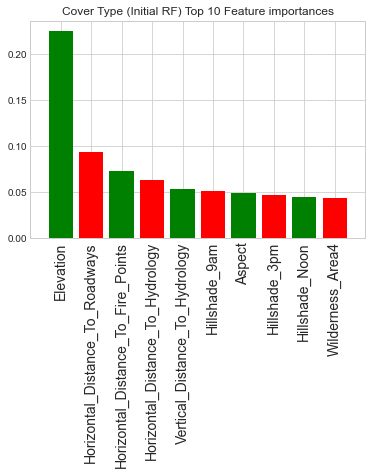

In [6]:
importances(rf_initial, train_df.iloc[:,1:], 'Cover Type (Initial RF)')

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64
15120


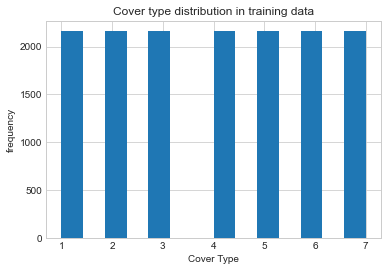

In [10]:

train_df['Cover_Type'].hist(bins=14).plot()
plt.title("Cover type distribution in training data")
plt.xlabel("Cover Type")
plt.ylabel("frequency")
print(train_df['Cover_Type'].value_counts())
print(len(train_df))

In [12]:
new = train_df.drop(['Id'],axis=1)

In [17]:
t = new.describe()
display(t.iloc[:,0:10].round(1))

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0
mean,2749.3,156.7,16.5,227.2,51.1,1714.0,212.7,219.0,135.1,1511.1
std,417.7,110.1,8.5,210.1,61.2,1325.1,30.6,22.8,45.9,1099.9
min,1863.0,0.0,0.0,0.0,-146.0,0.0,0.0,99.0,0.0,0.0
25%,2376.0,65.0,10.0,67.0,5.0,764.0,196.0,207.0,106.0,730.0
50%,2752.0,126.0,15.0,180.0,32.0,1316.0,220.0,223.0,138.0,1256.0
75%,3104.0,261.0,22.0,330.0,79.0,2270.0,235.0,235.0,167.0,1988.2
max,3849.0,360.0,52.0,1343.0,554.0,6890.0,254.0,254.0,248.0,6993.0


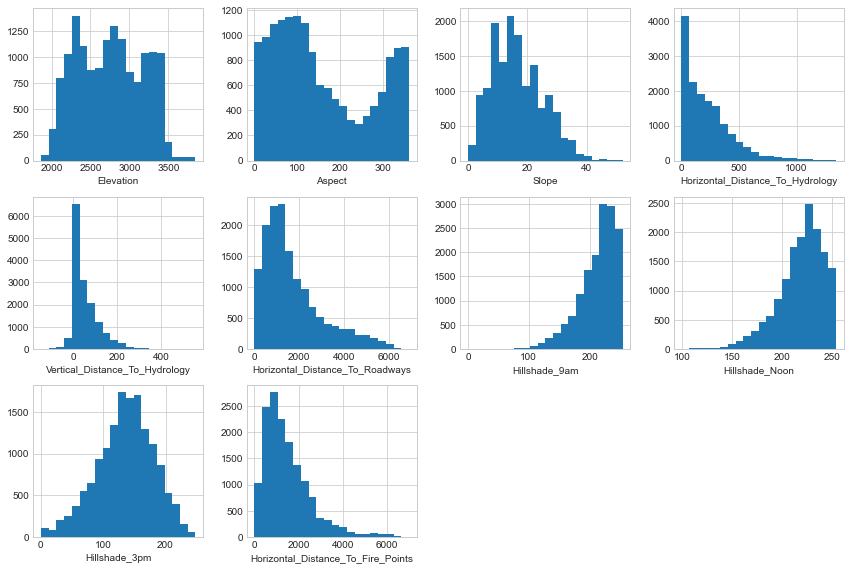

In [19]:
import matplotlib.gridspec as gridspec
#plots of continuous features in the train set
def get_axes( gs, plt, rows, cols ):
    axes = list()
    for i in range(rows):
        for j in range(cols):
            axes.append( plt.subplot( gs[i,j] ) )
    return axes

rows, cols = 3, 4
fig  = plt.figure(figsize=(12, 8))
gs   = gridspec.GridSpec(rows, cols)
axes = get_axes( gs, plt, rows, cols )

plot_these = new.columns[:10]

for i, feature_name in enumerate(plot_these):
    new[feature_name].hist(ax=axes[i], bins=20)
    axes[i].set_xlabel(feature_name)
axes[10].axis('off')
axes[11].axis('off')
plt.tight_layout()

plt.show()

In [28]:
# cover_types = [1, 2, 3, 4, 5, 6, 7]

# rows, cols = 8, 6
# fig = plt.figure(figsize=(12, 12))
# gs = gridspec.GridSpec(rows, cols)
# axes = get_axes( gs, plt, rows, cols )

# plot_these = new.columns[10:54]

# for i, feature_name in enumerate( plot_these ):
#     bars = np.array()
#     for c in cover_types:
#         val = np.sum(new[new['Cover_Type'] == c][feature_name])
#         bars.set_value(c, val)
#     bars.plot(kind='bar',ax=axes[i])
#     axes[i].set_xlabel(feature_name)

# for i in range(44,rows*cols): axes[i].axis('off')
    
# plt.tight_layout()

# plt.show()

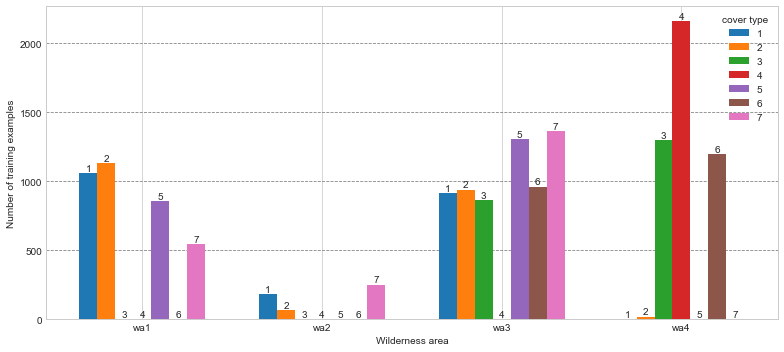

In [29]:
#count of cover type by wilderness area

cover_types = [1, 2, 3, 4, 5, 6, 7]
n_features = 4
plot_these = new.columns[10:10+n_features]
bar_width = 0.10
opacity = 0.4
error_config = {'ecolor': '0.3'}
fig     = plt.figure(figsize=(11, 5))
ax      = plt.gca()
ax.grid(axis='y', linestyle='dashed', color='gray')
ax.set_axisbelow(True)

index = np.arange(n_features)

all_bars = list()
for c in cover_types:
    bars = list()
    for i, feature_name in enumerate( plot_these ):
        val = np.sum(new[new['Cover_Type'] == c][feature_name])
        bars.append(val)
    all_bars.append(bars)

for i,cover_type in enumerate(cover_types):
    rects = ax.bar(index+i*bar_width, all_bars[i], bar_width,
                 error_kw=error_config,
                 label=cover_type, zorder=200)
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height, cover_type, 
                ha='center', va='bottom', zorder=200)

plt.xlabel('Wilderness area')
plt.ylabel('Number of training examples')
plt.xticks(index+(bar_width*len(cover_types))/2-bar_width/2, ('wa1', 'wa2', 'wa3', 'wa4'))
plt.legend(title='cover type')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Hillshade_9am VS Hillshade_3pm')

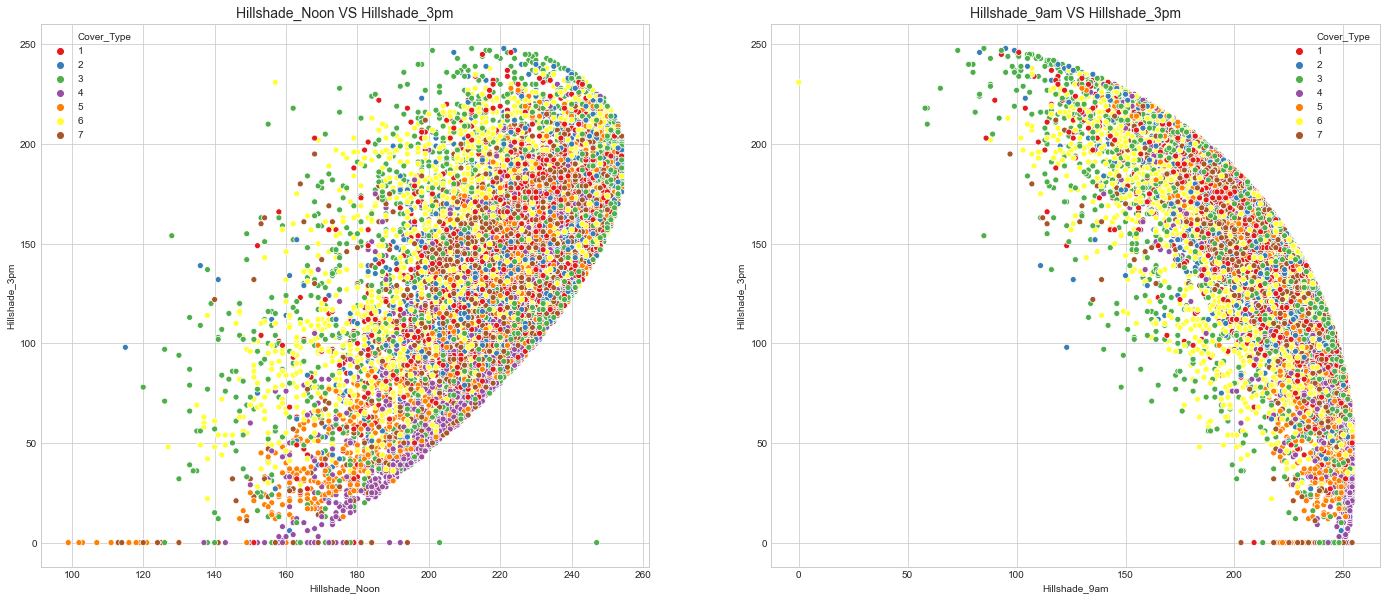

In [36]:
plt.figure(figsize=(24, 10))
# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Hillshade_Noon", y="Hillshade_3pm", 
                hue="Cover_Type", data=new, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_Noon VS Hillshade_3pm", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Hillshade_9am", y="Hillshade_3pm", 
                hue="Cover_Type", data=new, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_9am VS Hillshade_3pm", size=14)

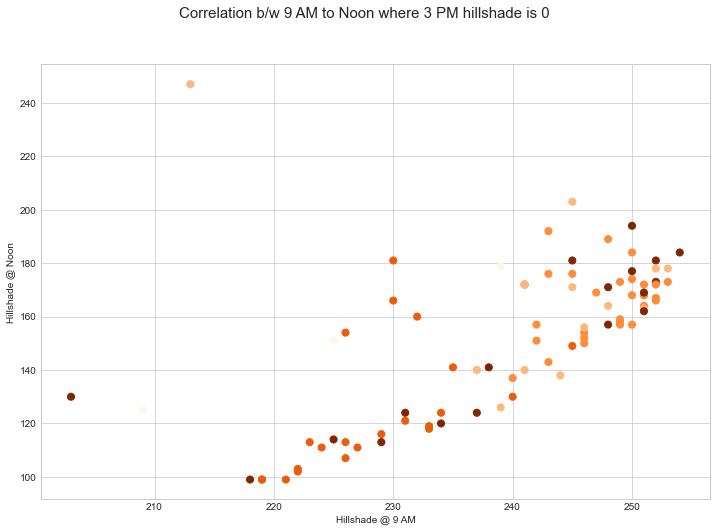

In [37]:
smaller_frame=new[new.Hillshade_3pm==0] 
plt.figure(figsize=(12,8)) 
plt.scatter(smaller_frame.Hillshade_9am,smaller_frame.Hillshade_Noon, c=smaller_frame.Cover_Type, s=50, cmap=plt.cm.Oranges) 
plt.suptitle('Correlation b/w 9 AM to Noon where 3 PM hillshade is 0', fontsize=15) 
plt.xlabel('Hillshade @ 9 AM') 
plt.ylabel('Hillshade @ Noon') 
plt.show() 

In [60]:
temp=new.copy() 
cols=temp.columns.tolist() 
cols=cols[:8]+cols[9:]+[cols[8]] 
temp=temp[cols] 
del temp['Cover_Type'] 


In [47]:
X,y,X_traincsv_missing,y_traincsv_missing= temp[temp.Hillshade_3pm!=0].values[:,:-1], \
temp[temp.Hillshade_3pm!=0].values[:,-1:].ravel(), \
temp[temp.Hillshade_3pm==0].values[:,:-1], \
temp[temp.Hillshade_3pm==0].values[:,-1:].ravel() 


X_train,X_test,y_train,y_test=train_test_split(X,y) 

In [144]:
len(X_traincsv_missing)


88

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(n_estimators=1000) 
gbrt.fit(X_train,y_train) 

GradientBoostingRegressor(n_estimators=1000)

Hillshade 3 PM Top 20 Important Features

1. Aspect (0.633423)
2. Slope (0.201761)
3. Hillshade_9am (0.121700)
4. Hillshade_Noon (0.043053)
5. Elevation (0.000014)
6. Hillshade_3pm (0.000011)
7. Horizontal_Distance_To_Roadways (0.000010)
8. Vertical_Distance_To_Hydrology (0.000008)
9. Horizontal_Distance_To_Hydrology (0.000006)
10. Wilderness_Area4 (0.000005)
11. Soil_Type9 (0.000002)
12. Soil_Type3 (0.000001)
13. Soil_Type29 (0.000001)
14. Soil_Type38 (0.000001)
15. Soil_Type5 (0.000001)
16. Soil_Type4 (0.000001)
17. Soil_Type1 (0.000000)
18. Soil_Type2 (0.000000)
19. Soil_Type36 (0.000000)
20. Soil_Type26 (0.000000)

Mean Feature Importance 0.018868


<ipython-input-4-22a328b48e1a>:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(10), importances[indices], color="gr", align="center")


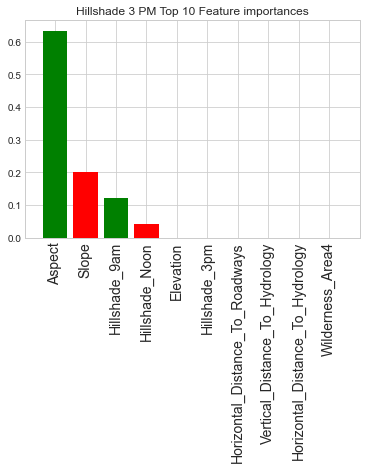

In [55]:
importances(gbrt, new, "Hillshade 3 PM")

In [154]:


# gbrt.predict(X_traincsv_missing)



In [146]:


# for index, ele in temp[['Hillshade_3pm']].iterrows(): 
# #     print(type(ele[0]))
#      if ele[0] == 0.0:
# #       temp['Hillshade_3pm'].iloc[index].replace(0, gbrt.predict(X_traincsv_missing)[0]) 
# #         gbrt.predict(X_traincsv_missing).pop(0)
# #         print('pooh')
#         print('p')
       
        


In [118]:
# temp.Hillshade_3pm.loc[temp.Hillshade_3pm==0]= gbrt.predict(X_traincsv_missing) 
# # new.Hillshade_3pm=temp.Hillshade_3pm 

In [150]:

nonzero_mean = temp[ temp.Hillshade_3pm != 0 ].mean()

temp['Hillshade_3pm'].replace(0, nonzero_mean)

0        148.0
1        151.0
2        135.0
3        122.0
4        150.0
         ...  
15115    214.0
15116     91.0
15117     83.0
15118    119.0
15119    164.0
Name: Hillshade_3pm, Length: 15120, dtype: float64

In [161]:
nonzero_mean = new[ new.Hillshade_3pm != 0 ].mean()

new['Hillshade_3pm'].replace(0, nonzero_mean)

# test_nonzero_mean = test_df[ test_df.Hillshade_3pm != 0 ].mean()

# test_df['Hillshade_3pm'].replace(0, nonzero_mean)

0        148
1        151
2        135
3        122
4        150
        ... 
15115    214
15116     91
15117     83
15118    119
15119    164
Name: Hillshade_3pm, Length: 15120, dtype: int64

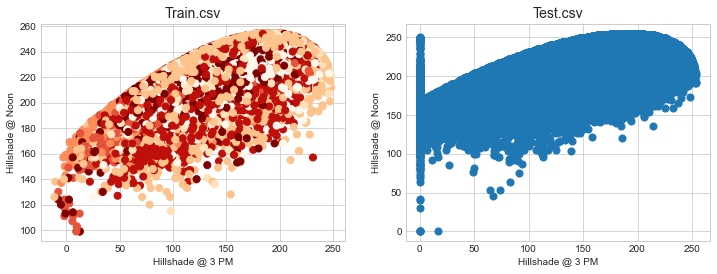

In [168]:
fig, ax=plt.subplots(1,2,figsize=(12,4)) 
ax[0].scatter(temp.Hillshade_3pm,temp.Hillshade_Noon, c=new.Cover_Type, s=50, cmap=plt.cm.OrRd) 
ax[0].set_xlabel('Hillshade @ 3 PM') 
ax[0].set_ylabel('Hillshade @ Noon') 
ax[0].set_title('Train.csv', fontsize=14) 

ax[1].scatter(test_df.Hillshade_3pm,test_df.Hillshade_Noon, s=50, cmap=plt.cm.PuBu) 
ax[1].set_xlabel('Hillshade @ 3 PM') 
ax[1].set_ylabel('Hillshade @ Noon') 
ax[1].set_title('Test.csv', fontsize=14) 
plt.show() 

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,3


In [31]:
print("Skew\n", new.iloc[:,:10].skew(), 
      "\nmin\n", new.iloc[:,:10].min(),
      "\nmax\n", new.iloc[:,:10].max())

Skew
 Elevation                             0.075640
Aspect                                0.450935
Slope                                 0.523658
Horizontal_Distance_To_Hydrology      1.488052
Vertical_Distance_To_Hydrology        1.537776
Horizontal_Distance_To_Roadways       1.247811
Hillshade_9am                        -1.093681
Hillshade_Noon                       -0.953232
Hillshade_3pm                        -0.340827
Horizontal_Distance_To_Fire_Points    1.617099
dtype: float64 
min
 Elevation                             1863
Aspect                                   0
Slope                                    0
Horizontal_Distance_To_Hydrology         0
Vertical_Distance_To_Hydrology        -146
Horizontal_Distance_To_Roadways          0
Hillshade_9am                            0
Hillshade_Noon                          99
Hillshade_3pm                            0
Horizontal_Distance_To_Fire_Points       0
dtype: int64 
max
 Elevation                             3849
Aspect     

In [34]:
new.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [173]:
def transform( df, before, after ):
    # must do different transformations depending on the sign of the feature's skew (Hillshade-9am is negative)
    print("%s => %s" % (before,after))
    fudge = 1
    skew_sign = df[before].skew()
    if (skew_sign > 0):
        if (df[before].min() < 0): fudge += -(df[before].min())
        df[after] = df[before].apply(lambda x: np.log10(x+fudge))
    else:
        fudge += df[before].max()
        df[after] = df[before].apply(lambda x: np.log10(fudge-x))
        
    print("   min before:",df[before].min())
    print("   max before:",df[before].max())
    print("   skew before:", df[before].skew())
    print("   skew_after:", df[after].skew())
    print("   min after:",df[after].min())
    print("   max after:",df[after].max())
    return df

def apply_transformations(new):
    new = transform(new,'Horizontal_Distance_To_Hydrology', 'hd_hy_log' )
    new = transform(new,'hd_hy_log', 'hd_hy_log_log' )
    new = transform(new,'Vertical_Distance_To_Hydrology', 'vd_hy_log' )
    new = transform(new,'Horizontal_Distance_To_Roadways', 'hd_rd_log' )
    new = transform(new,'Hillshade_9am',  'hs_9_log' )
    new = transform(new,'hs_9_log',  'hs_9_log_log' )
    new = transform(new,'Horizontal_Distance_To_Fire_Points', 'hd_fp_log' )
    return new

new = apply_transformations(new)

new.head(3)

Horizontal_Distance_To_Hydrology => hd_hy_log
   min before: 0
   max before: 1343
   skew before: 1.4880524908584847
   skew_after: -1.6089165303428363
   min after: 0.0
   max after: 3.1283992687178066
hd_hy_log => hd_hy_log_log
   min before: 0.0
   max before: 3.1283992687178066
   skew before: -1.6089165303428363
   skew_after: 0.9246254698830112
   min after: 1.9286549331065737e-16
   max after: 0.6157816924504698
Vertical_Distance_To_Hydrology => vd_hy_log
   min before: -146
   max before: 554
   skew before: 1.5377756804960931
   skew_after: 0.03521676381570889
   min after: 0.0
   max after: 2.8457180179666586
Horizontal_Distance_To_Roadways => hd_rd_log
   min before: 0
   max before: 6890
   skew before: 1.247810678465482
   skew_after: -0.6892190307043152
   min after: 0.0
   max after: 3.8382822499146885
Hillshade_9am => hs_9_log
   min before: 0
   max before: 254
   skew before: -1.0936805605383073
   skew_after: -1.1362708484557602
   min after: 0.0
   max after: 2.406

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type39,Soil_Type40,Cover_Type,hd_hy_log,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log,hs_9_log_log,hd_fp_log
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,5,2.413300,0.234289,2.167317,2.708421,1.531479,0.273015,3.797960
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,5,2.328380,0.255277,2.149219,2.592177,1.544068,0.270090,3.794209
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,2,2.429752,0.230103,2.326336,3.502564,1.322219,0.318965,3.786893


In [174]:
Drop_features = ['Horizontal_Distance_To_Hydrology','hd_hy_log','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
                 'Hillshade_9am','hs_9_log','Horizontal_Distance_To_Fire_Points','Cover_Type']

pd.set_option('display.max_columns',None)
display(new.head())
features = new.copy().drop(Drop_features, axis=1)
display(features.head(10))

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,hd_hy_log,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log,hs_9_log_log,hd_fp_log
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.413300,0.234289,2.167317,2.708421,1.531479,0.273015,3.797960
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.328380,0.255277,2.149219,2.592177,1.544068,0.270090,3.794209
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.429752,0.230103,2.326336,3.502564,1.322219,0.318965,3.786893
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2.385606,0.241246,2.423246,3.490099,1.230449,0.337677,3.793231
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.187521,0.287998,2.164353,2.593286,1.544068,0.270090,3.790496


,Elevation,Aspect,Slope,Hillshade_Noon,Hillshade_3pm,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log_log,hd_fp_log
0,2596,51,3,232,148,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.234289,2.167317,2.708421,0.273015,3.797960
1,2590,56,2,235,151,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.255277,2.149219,2.592177,0.270090,3.794209
2,2804,139,9,238,135,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.230103,2.326336,3.502564,0.318965,3.786893
3,2785,155,18,238,122,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.241246,2.423246,3.490099,0.337677,3.793231
4,2595,45,2,234,150,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.287998,2.164353,2.593286,0.270090,3.790496
5,2579,132,6,237,140,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.217440,2.120574,1.832509,0.302893,3.780461
6,2606,45,7,225,138,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.229280,2.181844,2.802089,0.276008,3.796366
7,2605,49,4,230,144,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.244854,2.187521,2.758912,0.276008,3.794418
8,2617,45,9,221,133,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.242139,2.307496,2.824126,0.279071,3.795532
9,2612,59,10,219,124,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.239036,2.198657,2.804139,0.295606,3.794558


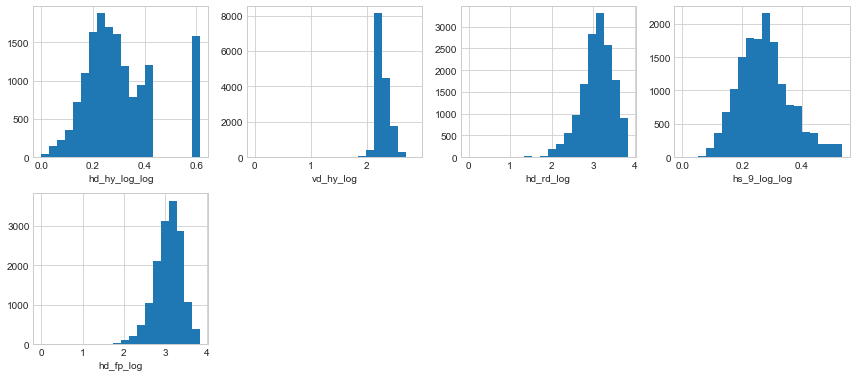

In [176]:
#
# Plot distribution of transformed features so we can visually confirm 
#   that they look more normal than before
#
rows, cols = 2, 4
fig  = plt.figure(figsize=(12, 5.35))
gs   = gridspec.GridSpec(rows, cols)
axes = get_axes( gs, plt, rows, cols )

plot_these = ['hd_hy_log_log','vd_hy_log','hd_rd_log','hs_9_log_log','hd_fp_log']

for i, feature_name in enumerate(plot_these):
    new[feature_name].hist(ax=axes[i], bins=20)
    axes[i].set_xlabel(feature_name)

for i in [5,6,7]: axes[i].axis('off')

plt.tight_layout()
plt.show()

In [179]:
#additonal feature engineering
new['Euclidian_Distance_To_Hydrology'] = (new['Horizontal_Distance_To_Hydrology']**2 + new['Vertical_Distance_To_Hydrology']**2)**0.5


In [180]:
#Elevation adjusted by Horizontal distance to Hyrdrology 
new['Elev_to_HD_Hyd']=new.Elevation - 0.2 * new.Horizontal_Distance_To_Hydrology 

new['Elev_to_HD_Road']=new.Elevation - 0.05 * new.Horizontal_Distance_To_Roadways 
 
new['Elev_to_VD_Hyd']=new.Elevation - new.Vertical_Distance_To_Hydrology 

new


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,hd_hy_log,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log,hs_9_log_log,hd_fp_log,Euclidian_Distance_To_Hydrology,Elev_to_HD_Hyd,Elev_to_HD_Road,Elev_to_VD_Hyd
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.413300,0.234289,2.167317,2.708421,1.531479,0.273015,3.797960,258.000000,2544.4,2570.50,2596
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.328380,0.255277,2.149219,2.592177,1.544068,0.270090,3.794209,212.084889,2547.6,2570.50,2596
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.429752,0.230103,2.326336,3.502564,1.322219,0.318965,3.786893,275.769832,2750.4,2645.00,2739
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2.385606,0.241246,2.423246,3.490099,1.230449,0.337677,3.793231,269.235956,2736.6,2630.50,2667
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.187521,0.287998,2.164353,2.593286,1.544068,0.270090,3.790496,153.003268,2564.4,2575.45,2596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.413300,0.234289,2.187521,2.820201,1.929419,0.169416,3.108227,258.094944,2555.4,2574.00,2600
15116,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.802089,0.122645,2.534026,2.791691,0.778151,0.419690,3.122544,662.354890,2476.4,2572.10,2408
15117,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.563481,0.194492,2.421604,2.526339,0.698970,0.432580,3.074816,383.293621,2419.0,2475.25,2375
15118,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.340444,0.252357,2.394452,2.385606,1.414973,0.299195,2.969882,240.260276,2443.4,2474.90,2386


In [183]:
#models

In [186]:
new


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,hd_hy_log,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log,hs_9_log_log,hd_fp_log,Euclidian_Distance_To_Hydrology,Elev_to_HD_Hyd,Elev_to_HD_Road,Elev_to_VD_Hyd
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.413300,0.234289,2.167317,2.708421,1.531479,0.273015,3.797960,258.000000,2544.4,2570.50,2596
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.328380,0.255277,2.149219,2.592177,1.544068,0.270090,3.794209,212.084889,2547.6,2570.50,2596
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.429752,0.230103,2.326336,3.502564,1.322219,0.318965,3.786893,275.769832,2750.4,2645.00,2739
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2.385606,0.241246,2.423246,3.490099,1.230449,0.337677,3.793231,269.235956,2736.6,2630.50,2667
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.187521,0.287998,2.164353,2.593286,1.544068,0.270090,3.790496,153.003268,2564.4,2575.45,2596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.413300,0.234289,2.187521,2.820201,1.929419,0.169416,3.108227,258.094944,2555.4,2574.00,2600
15116,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.802089,0.122645,2.534026,2.791691,0.778151,0.419690,3.122544,662.354890,2476.4,2572.10,2408
15117,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.563481,0.194492,2.421604,2.526339,0.698970,0.432580,3.074816,383.293621,2419.0,2475.25,2375
15118,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.340444,0.252357,2.394452,2.385606,1.414973,0.299195,2.969882,240.260276,2443.4,2474.90,2386


In [191]:
from sklearn.model_selection import train_test_split
features = new.drop(['Cover_Type'], axis =1)


classes  = new['Cover_Type']
# Split the 'features' and COVER TYPE data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print(y_train.value_counts())

Training set has 12096 samples.
Testing set has 3024 samples.
2    1749
3    1742
7    1741
5    1732
4    1722
1    1721
6    1689
Name: Cover_Type, dtype: int64


In [223]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtrain, ytrain), model.score(xtest, ytest)


def quick_test_a_few_times(model, X, y, n=10):
    return (pd.DataFrame([quick_test(model, X, y) for j in range(n)],
                         columns=['Train Acc', 'Test Acc'])).mean()

# new_model = make_pipeline(StandardScaler(), LinearSVC(max_iter=10000))
# # pred = new_model.predict(X_test)
# # Do the test 10 times with a LinearSVC and get the average score
# print(quick_test_a_few_times(new_model, X_train, y_train))

In [333]:
def get_scores(model):
    mod = model
    mod = mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    # quick_test_a_few_times(decisiontree, X_train, y_train)

    print(f'**Model: {mod}**')
    print(f'Train accuracy: {mod.score(X_train, y_train)}')
    print(f'Test accuracy: {mod.score(X_test, y_test)}')
    print(f'Precision: {precision_score(y_test, predictions)}')
    print(f'Recall: {recall_score(y_test, predictions)}')
    print()
    print(classification_report(y_test, predictions))
    print()

In [ ]:
# random_forest = RandomForestClassifier()
# quick_test_a_few_times(random_forest, X_train, y_train)
# get_scores(random_forest)

In [ ]:
# grad_boost = GradientBoostingClassifier()
# quick_test_a_few_times(grad_boost, X_train, y_train)
# get_scores(grad_boost)

In [ ]:
features = new.drop(['Cover_Type'], axis =1)


classes  = new['Cover_Type']
# Split the 'features' and COVER TYPE data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size = 0.2, random_state = 0)

In [237]:

# Create list of model and accuracy dicts
list_of_perform = []

# List to keep track of models
models = []

# List to keep track of y_scores
y_scores = []

In [239]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train, y_train)


X_test_scaled = scaler.transform(X_test)

In [243]:
#LOGISTIC REGRESSION
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score

lr_baseline = LogisticRegression(random_state=1)

# Calculate accuracy of train
lr_base_acc = cross_val_score(lr_baseline, X_train_scaled, y_train).mean()
lr_base_std = cross_val_score(lr_baseline, X_train_scaled, y_train).std()
print('Accuracy of log reg baseline (TRAIN): {} +/- {}'.format(round(lr_base_acc, 2), round(lr_base_std, 2)))

# Fit model
lr_baseline.fit(X_train_scaled, y_train)

# Get predictions and probabilities
lr_base_preds = lr_baseline.predict(X_test_scaled)
lr_base_y_score = lr_baseline.predict_proba(X_test_scaled)

# Calculate accuracy of test
lr_base_acc_test = round(accuracy_score(y_test, lr_base_preds), 2)
print(f'Accuracy of log reg baseline (TEST): {lr_base_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, lr_base_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'LogReg Base'),
    ('Train Accuracy', round(lr_base_acc, 2)),
    ('Test Accuracy', lr_base_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('LogReg Base')

# Add y_score to list
y_scores.append(lr_base_y_score)

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Accuracy of log reg baseline (TRAIN): 0.72 +/- 0.0
Accuracy of log reg baseline (TEST): 0.73

Precision : 0.7250302901940228
Recall    : 0.7292826034796077
F-score   : 0.7266456675857269


/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [244]:
#GRID SEARCH LOGISTIC REGRESSION
# Define the parameter values that should be searched
C_range = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10, 40, 50, 60, 100, 1000]
fit_intercept_range = [True, False]

print(C_range,
      fit_intercept_range)

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 40, 50, 60, 100, 1000] [True, False]


In [248]:

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=C_range,
                  fit_intercept=fit_intercept_range,)
print(param_grid)

{'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 40, 50, 60, 100, 1000], 'fit_intercept': [True, False]}


In [249]:
# Instantiate and fit the grid
lr_grid = GridSearchCV(lr_baseline, param_grid)
lr_grid.fit(X_train, y_train)

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

GridSearchCV(estimator=LogisticRegression(random_state=1),
             param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                               10, 40, 50, 60, 100, 1000],
                         'fit_intercept': [True, False]})

In [250]:
# View best parameter
print('Best parameters found:')
print()
print(lr_grid.best_params_)

Best parameters found:

{'C': 60, 'fit_intercept': False}


In [251]:
# Instantiate model
lr_opt = LogisticRegression(C=60, fit_intercept=False, random_state=1)

# Calculate accuracy of train
lr_opt_acc = cross_val_score(lr_opt, X_train_scaled, y_train).mean()
lr_opt_std = cross_val_score(lr_opt, X_train_scaled, y_train).std()
print('Accuracy of log reg optimized (TRAIN): {} +/- {}'.format(round(lr_opt_acc, 2), round(lr_opt_std, 2)))

# Fit model
lr_opt.fit(X_train_scaled, y_train)

# Get predictions and probabilities
lr_opt_preds = lr_opt.predict(X_test_scaled)
lr_opt_y_score = lr_opt.predict_proba(X_test_scaled)

# Calculate accuracy of test
lr_opt_acc_test = round(accuracy_score(y_test, lr_opt_preds), 2)
print(f'Accuracy of log reg optimized (TEST): {lr_opt_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, lr_opt_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'LogReg Opt GS'),
    ('Train Accuracy', round(lr_opt_acc, 2)),
    ('Test Accuracy', lr_opt_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))
# Add model to list
models.append('LogReg Opt GS')

# Add y_score to list
y_scores.append(lr_opt_y_score)

/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Accuracy of log reg optimized (TRAIN): 0.72 +/- 0.0
Accuracy of log reg optimized (TEST): 0.73

Precision : 0.7237541878117631
Recall    : 0.7277860768172574
F-score   : 0.7254103980655442


/Users/SirLawrenceKatz/Desktop/MetisBootCAMP/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [313]:
# Instantiate model
from sklearn.metrics import f1_score

neigh_base = KNeighborsClassifier(n_neighbors=3)

# Calculate accuracy of train
neigh_base_acc = cross_val_score(neigh_base, X_train_scaled, y_train).mean()
neigh_base_std = cross_val_score(neigh_base, X_train_scaled, y_train).std()
print('Accuracy of KNN baseline (TRAIN): {} +/- {}'.format(round(neigh_base_acc, 2), round(neigh_base_std, 2)))

# Fit model
neigh_base.fit(X_train_scaled, y_train)

# Get predictions and probabilities
neigh_base_preds = neigh_base.predict(X_test_scaled)
neigh_base_y_score = neigh_base.predict_proba(X_test_scaled)

# Calculate accuracy of test
neigh_base_acc_test = round(accuracy_score(y_test, neigh_base_preds), 2)
print(f'Accuracy of KNN baseline (TEST): {neigh_base_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, lr_opt_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')



# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'KNN Base'),
    ('Train Accuracy', round(neigh_base_acc, 2)),
    ('Test Accuracy', neigh_base_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))
# Add model to list
models.append('KNN Base')

# Add y_score to list
y_scores.append(neigh_base_y_score)

Accuracy of KNN baseline (TRAIN): 0.8 +/- 0.01
Accuracy of KNN baseline (TEST): 0.82

Precision : 0.7237541878117631
Recall    : 0.7277860768172574
F-score   : 0.7254103980655442


In [290]:
# Instantiate the model
svc_base = SVC(probability=True, random_state=1)

# Calculate accuracy of train
svc_base_acc = cross_val_score(svc_base, X_train_scaled, y_train).mean()
svc_base_std = cross_val_score(svc_base, X_train_scaled, y_train).std()
print('Accuracy of SVC baseline (TRAIN): {} +/- {}'.format(round(svc_base_acc, 2), round(svc_base_std, 2)))

# Fit model
svc_base.fit(X_train_scaled, y_train)

# Get predictions and probabilities
svc_base_preds = svc_base.predict(X_test_scaled)
svc_base_y_score = svc_base.predict_proba(X_test_scaled)

# Calculate accuracy of test
svc_base_acc_test = round(accuracy_score(y_test, svc_base_preds), 2)
print(f'Accuracy of SVC baseline (TEST): {svc_base_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, svc_base_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'SVC Base'),
    ('Train Accuracy', round(svc_base_acc, 2)),
    ('Test Accuracy', svc_base_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))
# Add model to list
models.append('SVC Base')

# Add y_score to list
y_scores.append(svc_base_y_score)

Accuracy of SVC baseline (TRAIN): 0.76 +/- 0.01
Accuracy of SVC baseline (TEST): 0.76

Precision : 0.7593275588633823
Recall    : 0.760337722619537
F-score   : 0.7593314345105967


In [315]:
# Instantiate the model
#DECISION TREE
dt_base = DecisionTreeClassifier(random_state=1)

# Calculate accuracy of train
dt_base_acc = cross_val_score(dt_base, X_train_scaled, y_train).mean()
dt_base_std = cross_val_score(dt_base, X_train_scaled, y_train).std()
print('Accuracy of Decision Tree baseline (TRAIN): {} +/- {}'.format(round(dt_base_acc, 2), round(dt_base_std, 2)))

# Fit model
dt_base.fit(X_train_scaled, y_train)

# Get predictions and probabilities
dt_base_preds = dt_base.predict(X_test_scaled)
dt_base_y_score = dt_base.predict_proba(X_test_scaled)

# Calculate accuracy of test
dt_base_acc = round(accuracy_score(y_test, dt_base_preds), 2)
print(f'Accuracy of Decision Tree baseline (TEST): {dt_base_acc}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, dt_base_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'DecTree Base'),
    ('Train Accuracy', round(dt_base_acc, 2)),
    ('Test Accuracy', dt_base_acc),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('DecTree Base')

# Add y_score to list
y_scores.append(dt_base_y_score)

Accuracy of Decision Tree baseline (TRAIN): 0.78 +/- 0.01
Accuracy of Decision Tree baseline (TEST): 0.78

Precision : 0.7831586342142128
Recall    : 0.7838927165692322
F-score   : 0.7833040302808928


In [316]:
# Instantiate the model
rf_base = RandomForestClassifier(random_state=1)

# Calculate accuracy of train
rf_base_acc = cross_val_score(rf_base, X_train_scaled, y_train).mean()
rf_base_std = cross_val_score(rf_base, X_train_scaled, y_train).std()
print('Accuracy of Random Forest baseline (TRAIN): {} +/- {}'.format(round(rf_base_acc, 2), round(rf_base_std, 2)))

# Fit model
rf_base.fit(X_train_scaled, y_train)

# Get predictions and probabilities
rf_base_preds = rf_base.predict(X_test_scaled)
rf_base_y_score = rf_base.predict_proba(X_test_scaled)

# Calculate accuracy of test
rf_base_acc_test = round(accuracy_score(y_test, rf_base_preds), 2)
print(f'Accuracy of Random Forest baseline (TEST): {rf_base_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, rf_base_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'RandFor Base'),
    ('Train Accuracy', round(rf_base_acc, 2)),
    ('Test Accuracy', rf_base_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('RandFor Base')

# Add y_score to list
y_scores.append(rf_base_y_score)

Accuracy of Random Forest baseline (TRAIN): 0.86 +/- 0.01
Accuracy of Random Forest baseline (TEST): 0.85

Precision : 0.8512383809601051
Recall    : 0.8541625480406372
F-score   : 0.8519307422545026


In [319]:

# Define parameters that should be searched
n_estimators_range = [x for x in range(1,31)]
criterion_range = ['gini', 'entropy']
max_features_range = [None, 'auto', 'log2', 1, 2, 3, 4, 5, 6, 7, 8]
max_depth_range = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split_range = [10, 20, 50, 100, 500]
min_samples_leaf_range = [10, 20, 50, 100, 250, 500]
bootstrap_range = [True, False]

# Create a parameter grid: map the parameter names to the values that should be searched
param_rand_rf = dict(n_estimators=n_estimators_range,
                     criterion=criterion_range,
                     max_features=max_features_range,
                     max_depth=max_depth_range,
                     min_samples_split=min_samples_split_range,
                     min_samples_leaf=min_samples_leaf_range,
                     bootstrap=bootstrap_range
)

print(param_rand_rf)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'criterion': ['gini', 'entropy'], 'max_features': [None, 'auto', 'log2', 1, 2, 3, 4, 5, 6, 7, 8], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [10, 20, 50, 100, 500], 'min_samples_leaf': [10, 20, 50, 100, 250, 500], 'bootstrap': [True, False]}


In [372]:
# Choose number of searches
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 40
scorer = sklearn.metrics.make_scorer(sklearn.metrics.recall_score, average = 'macro')
# Instantiate the model
rf_random_search = RandomizedSearchCV(rf_base, param_distributions=param_rand_rf, n_iter=n_iter_search)

# Fit the model
rf_random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1), n_iter=40,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10],
                                        'max_features': [None, 'auto', 'log2',
                                                         1, 2, 3, 4, 5, 6, 7,
                                                         8],
                                        'min_samples_leaf': [10, 20, 50, 100,
                                                             250, 500],
                                        'min_samples_split': [10, 20, 50, 100,
                                                              500],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                    

In [373]:
# View best parameters
print('Best parameters found:')
print()
print(rf_random_search.best_params_)

Best parameters found:

{'n_estimators': 7, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 4, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}


In [328]:
# Instantiate the model
rf_opt = RandomForestClassifier(n_estimators=12,
                                criterion='entropy',
                                max_features=6,
                                max_depth=None,
                                min_samples_split=100,
                                min_samples_leaf=20,
                                bootstrap=False,
                                random_state=1)

# Calculate the accuracy of train
rf_opt_acc = cross_val_score(rf_opt, X_train_scaled, y_train).mean()
rf_opt_std = cross_val_score(rf_opt, X_train_scaled, y_train).std()
print('Accuracy of Random Forest optimized (TRAIN): {} +/- {}'.format(round(rf_opt_acc, 2), round(rf_opt_std, 2)))

# Fit model
rf_opt.fit(X_train_scaled, y_train)

# Get predictions and probabilities
rf_opt_preds = rf_base.predict(X_test_scaled)
rf_opt_y_score = rf_base.predict_proba(X_test_scaled)

# Calculate accuracy of test
rf_opt_acc_test = round(accuracy_score(y_test, rf_opt_preds), 2)
print(f'Accuracy of Random Forest optimized (TEST): {rf_opt_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, rf_opt_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'RandFor Opt RS'),
    ('Train Accuracy', round(rf_opt_acc, 2)),
    ('Test Accuracy', rf_opt_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('RandFor Opt RS')

# Add y_score to list
y_scores.append(rf_opt_y_score)


Accuracy of Random Forest optimized (TRAIN): 0.77 +/- 0.01
Accuracy of Random Forest optimized (TEST): 0.85

Precision : 0.8512383809601051
Recall    : 0.8541625480406372
F-score   : 0.8519307422545026


In [329]:
# Instantiate the model
xgb_base = XGBClassifier()

# Calculate accuracy of train
xgb_base_acc = cross_val_score(xgb_base, X_train_scaled, y_train).mean()
xgb_base_std = cross_val_score(xgb_base, X_train_scaled, y_train).std()
print('Accuracy of XGB baseline (TRAIN): {} +/- {}'.format(round(rf_base_acc, 2), round(rf_base_std, 2)))

# Fit model
xgb_base.fit(X_train_scaled, y_train)

# Get predictions and probabilities
xgb_base_preds = xgb_base.predict(X_test_scaled)
xgb_base_y_score = xgb_base.predict_proba(X_test_scaled)

# Calculate accuracy of test
xgb_base_acc_test = round(accuracy_score(y_test, xgb_base_preds), 2)
print(f'Accuracy of XGB baseline (TEST): {xgb_base_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, xgb_base_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'XGB Base'),
    ('Train Accuracy', round(xgb_base_acc, 2)),
    ('Test Accuracy', xgb_base_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('XGB Base')

# Add y_score to list
y_scores.append(rf_base_y_score)

Accuracy of XGB baseline (TRAIN): 0.86 +/- 0.01
Accuracy of XGB baseline (TEST): 0.85

Precision : 0.8455630315889495
Recall    : 0.8484652745365342
F-score   : 0.8462913934326753


In [330]:
# Define parameters that should be searched
learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] 
max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15]
min_child_weight = [ 1, 3, 5, 7 ]
gamma= [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
colsample_bytree =[ 0.3, 0.4, 0.5 , 0.7 ] 
subsample = [0.6, 0.8, 1.0]


print(learning_rate,
      max_depth,
      min_child_weight,
      gamma,
      colsample_bytree,
      subsample
)

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3] [3, 4, 5, 6, 8, 10, 12, 15] [1, 3, 5, 7] [0.0, 0.1, 0.2, 0.3, 0.4] [0.3, 0.4, 0.5, 0.7] [0.6, 0.8, 1.0]


In [331]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid_5 = dict(learning_rate=learning_rate,
                    max_depth=max_depth,
                    min_child_weight=min_child_weight,
                    gamma=gamma,
                    colsample_bytree=colsample_bytree,
                    subsample=subsample
)

print(param_grid_5)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7], 'subsample': [0.6, 0.8, 1.0]}


In [332]:
rf_random_search = RandomizedSearchCV(xgb_base, param_distributions=param_grid_5, n_iter=n_iter_search, scoring = scorer)

# Fit the model
rf_random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_paralle...
                                           subsample=1, tree_method='exact',
                                           validate_parameters=1,
             

In [334]:
# View best parameters
print('Best parameters found:')
print()
print(rf_random_search.best_params_)


Best parameters found:

{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 0.0, 'colsample_bytree': 0.4}


In [337]:
# Instantiate the model
xgb_opt = XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, 
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           subsample=1, tree_method='exact',
                                           validate_parameters=1,
                                           verbosity=None)

# Calculate accuracy of train
xgb_opt_acc = cross_val_score(xgb_opt, X_train_scaled, y_train).mean()
xgb_opt_std = cross_val_score(xgb_opt, X_train_scaled, y_train).std()
print('Accuracy of XGB baseline (TRAIN): {} +/- {}'.format(round(xgb_opt_acc, 2), round(xgb_opt_std, 2)))

# Fit model
xgb_opt.fit(X_train_scaled, y_train)

# Get predictions and probabilities
xgb_opt_preds = xgb_opt.predict(X_test_scaled)
xgb_opt_y_score = xgb_opt.predict_proba(X_test_scaled)

# Calculate accuracy of test
xgb_opt_acc_test = round(accuracy_score(y_test, xgb_opt_preds), 2)
print(f'Accuracy of XGB baseline (TEST): {xgb_opt_acc_test}')

print()

# Get precision, recall, f1-score
precision, recall, fscore, support = score(y_test, xgb_opt_preds, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# Add model and accuracy dict to list
list_of_perform.append(dict([
    ('Model', 'XGB Opt'),
    ('Train Accuracy', round(xgb_opt_acc, 2)),
    ('Test Accuracy', xgb_opt_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# Add model to list
models.append('XGB Opt')

# Add y_score to list
y_scores.append(xgb_opt_y_score)

Accuracy of XGB baseline (TRAIN): 0.86 +/- 0.01
Accuracy of XGB baseline (TEST): 0.85

Precision : 0.8455630315889495
Recall    : 0.8484652745365342
F-score   : 0.8462913934326753


In [340]:
# View feature importances
pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_opt.feature_importances_
}).head(12)

,feature,importance
0,Elevation,0.088562
1,Aspect,0.006069
2,Slope,0.004786
3,Horizontal_Distance_To_Hydrology,0.008531
4,Vertical_Distance_To_Hydrology,0.005760
5,Horizontal_Distance_To_Roadways,0.008035
6,Hillshade_9am,0.012633
7,Hillshade_Noon,0.007352
8,Hillshade_3pm,0.005912
9,Horizontal_Distance_To_Fire_Points,0.008374


In [381]:
model_perf = pd.DataFrame(data=list_of_perform)
model_perf = model_perf[['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_perf.drop_duplicates(subset = 'Model', keep="last",inplace=True)
model_perf

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,LogReg Base,0.72,0.73,0.73,0.73,0.73
1,LogReg Opt GS,0.72,0.73,0.72,0.73,0.73
6,SVC Base,0.76,0.76,0.76,0.76,0.76
8,KNN Base,0.80,0.82,0.72,0.73,0.73
9,DecTree Base,0.78,0.78,0.78,0.78,0.78
10,RandFor Base,0.86,0.85,0.85,0.85,0.85
13,RandFor Opt RS,0.77,0.85,0.85,0.85,0.85
14,XGB Base,0.86,0.85,0.85,0.85,0.85
16,XGB Opt,0.86,0.85,0.85,0.85,0.85


In [360]:

# Convert y_test and y_test_norm to binary (previously 1, 2 --> now 0, 1)
y_test_bin = np.where(y_test == 1, 0, 1)


array([7.09315880e-08, 7.09927919e-10, 1.35334898e-05, ...,
       8.70148431e-08, 1.43477555e-01, 4.04509926e-05])

In [365]:
def plot_roc_curves():
    plt.figure(figsize=(10,6))
    lw = 2
    
    # Logistic Regression Baseline
    fpr, tpr, thresholds = roc_curve(y_test_bin, lr_base_y_score[:,1], pos_label=0)
    auc_lr = roc_auc_score(y_test_bin, lr_base_y_score[:,1], average=None)
    plt.plot(fpr, tpr, color='r',
             lw=lw, label='LR Baseline')
        
    # Logistic Regression w/ Grid Search
    fpr, tpr, thresholds = roc_curve(y_test_bin, lr_opt_y_score[:,1], pos_label=0)
    auc_lr_opt = roc_auc_score(y_test_bin, lr_opt_y_score[:,1])
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='LR Optimized')
        
    # KNN Baseline
    fpr, tpr, thresholds = roc_curve(y_test_bin, neigh_base_y_score[:,1], pos_label=0)
    auc_knn = roc_auc_score(y_test_bin, neigh_base_y_score[:,1])
    plt.plot(fpr, tpr, color='y',
             lw=lw, label='KNN Baseline')
    
    # SVC Baseline
    fpr, tpr, thresholds = roc_curve(y_test_bin, svc_base_y_score[:,1], pos_label=0)
    auc_svc = roc_auc_score(y_test_bin, svc_base_y_score[:,1])
    plt.plot(fpr, tpr, color='#ff1493',
             lw=lw, label='SVC Baseline')
    
    
    # Decision Tree Baseline
    fpr, tpr, thresholds = roc_curve(y_test_bin, dt_base_y_score[:,1], pos_label=0)
    auc_dt_base = roc_auc_score(y_test_bin, dt_base_y_score[:,1])
    plt.plot(fpr, tpr, color='m',
             lw=lw, label='Decision Tree Baseline')
    
    # Random Forest Baseline
    fpr, tpr, thresholds = roc_curve(y_test_bin, rf_base_y_score[:,1], pos_label=0)
    auc_rf = roc_auc_score(y_test_bin, rf_base_y_score[:,1])
    plt.plot(fpr, tpr, color='#08e8de',
             lw=lw, label='Random Forest Baseline')
    
    # Random Forest w/ Random Search
    fpr, tpr, thresholds = roc_curve(y_test_bin, rf_opt_y_score[:,1], pos_label=0)
    auc_rf_opt = roc_auc_score(y_test_bin, rf_opt_y_score[:,1])
    plt.plot(fpr, tpr, color='#00cc99',
             lw=lw, label='Random Forest Optimized')
    
    
    # XGB Baseline
    fpr, tpr, thresholds = roc_curve(y_test_bin, xgb_base_y_score[:,1], pos_label=0)
    auc_rf = roc_auc_score(y_test_bin, xgb_base_y_score[:,1])
    plt.plot(fpr, tpr, color='#9966cc',
             lw=lw, label='XGB Baseline')
    
    # XGB w/ Random Search
    fpr, tpr, thresholds = roc_curve(y_test_bin, xgb_opt_y_score[:,1], pos_label=0)
    auc_rf_opt = roc_auc_score(y_test_bin, xgb_opt_y_score[:,1])
    plt.plot(fpr, tpr, color='b',
             lw=lw, label='XGB Optimized')
    
    # Formatting
    plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.title('Receiver Operating Characteristic', fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

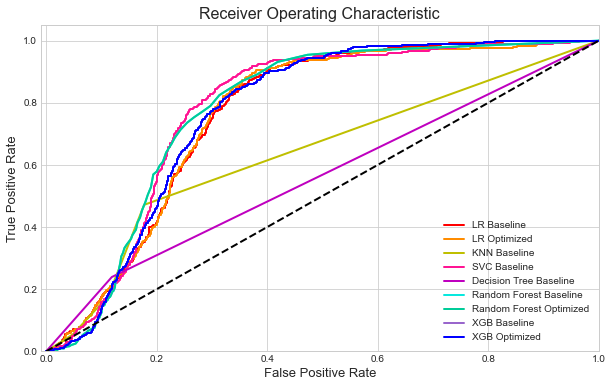

In [366]:

plot_roc_curves()

In [307]:
from xgboost import XGBClassifier
# create model apply fit_evaluate_model

def fit_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    return accuracy_score(y_test, y_predicted)


xgb_classifier = XGBClassifier()
xgb_accuracy = fit_evaluate_model(xgb_classifier, X_train_scaled, y_train, X_test_scaled, y_test)
print("Number of correct predictions made out of all predictions are:", xgb_accuracy)

Number of correct predictions made out of all predictions are: 0.8492063492063492


In [379]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(range(7), ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas', 'Krummholz'], fontsize=14, rotation=90) 
def train_score(classifier,X_train_scaled, y_train, X_valid_scaled, y_valid):
    clf = classifier.fit(X_train_scaled, y_train)
    
    train_acc=clf.score(X_train_scaled, y_train)
    test_acc=clf.score(X_valid_scaled, y_valid)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = y_valid
    y_pred = clf.predict(X_valid_scaled)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    
    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 1.00
Test Data Accuracy:     0.85
[[327  73   1   0   5   1  32]
 [ 75 277  14   0  32   8   5]
 [  0   0 349  22   7  40   0]
 [  0   0  10 424   0   4   0]
 [  0  11   8   0 405   4   0]
 [  0   3  52   7   9 400   0]
 [ 15   1   0   0   0   0 403]]


Precision:              0.81
Recall:                 0.82


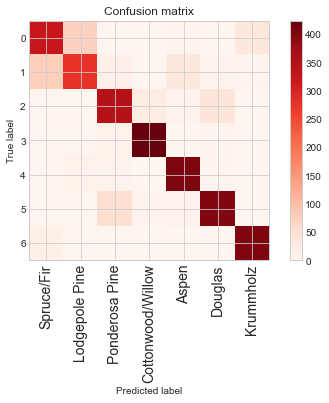

In [380]:
rf_cm= RandomForestClassifier(random_state=1)


train_score(rf_cm,X_train_scaled,y_train,X_test_scaled,y_test)